<a href="https://colab.research.google.com/github/fredtaranto/data_science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Florença, ITÁLIA*

#### **Data Science na Prática 2.0**
*autor [Frederico Fragata](https://www.linkedin.com/in/fredericofragata)*

--- 

<br>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**... e o mais impressionante é que **não possui 1 hotel sequer**! 

Desde que surgiu como uma plataforma inovadora e amigável, o Airbnb transformou o mercado de turismo mundial, em especial o de aluguel por temporada. Economicamente, o compartilhamento de espaços ao redor do mundo resultou num impacto positivo para várias regiões. Hoje o Airbnb conta com **mais de 7 milhões de anúncios** em todo o mundo.

No final de 2018, a Startup fundada há 10 anos, e que já é considerada uma *decacórnio* (que vale 10 bilhões de dólares ou mais), já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados, de algumas das principais cidades do mundo, provenientes de informações publicamente disponíveis no site. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados – *open source data* – para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Airbnb logo" width="14%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste *notebook* será analisado os dados referentes à cidade de Florença (em italiano, Firenze), capital da região Toscana, na Itália, cidade histórica que abriga muitas obras de arte e arquitetura renascentistas. Aqui, executarei uma análise exploratória do conjunto de dados para definir quais insights podem ser extraídos a partir de dados brutos.

<center><img title="fonte: cdn.albergues.com" alt="Florence, Italy" width="100%" src="https://cdn.albergues.com/city_images/Italy/florence.jpg
"></center>


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listing.csv` - Summary information and metrics for listings in Florence (good for visualisations). 


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo listing.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/italy/toscana/florence/2020-05-24/visualisations/listings.csv")

## Análise dos Dados

Essa etapa tem o objetivo de fazer uma análise inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do anfitrião (proprietário)
* host_name - nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - Tipo de quarto oferecido
* price - preço da diária
* minimum_nights - quantidade mínima de diárias permitidas
* number_of_reviews - quantidade de reviews que a propriedade possui
* last_review - data do último review efetuado
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias com disponibilidade de alugar nos próximos 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78308,11.24418,Entire home/apt,80,2,1,2019-09-27,0.12,5,346
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78287,11.24431,Entire home/apt,75,2,3,2019-04-21,0.03,5,353
2,24471,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78292,11.24460,Entire home/apt,135,2,0,NaN,NaN,5,351
3,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78150,11.24507,Entire home/apt,120,2,2,2012-04-11,0.02,5,352
4,24807,Beautiful Apartment Florence & WIFI,68490,Alberto,NaN,Campo di Marte,43.77813,11.29202,Entire home/apt,51,2,348,2019-09-13,2.85,1,361


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vou verificar a quantidade de entradas no conjunto de dados e os tipos de variáveis em cada coluna.

Este *dataset* baixado é a versão "resumida" do Airbnb. Existem outros arquivos mais completos, na mesma páginá, porém esta versão será suficiente para esta análise.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 12124
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui **100%** dos seus valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos (NaN) em **17%** das linhas.
* A variável `name` tem o percentual dos valores nulos **< 0,1%**.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.170571
last_review                       0.170571
name                              0.000247
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma. Neste primeiro momento os dados não tiveram nenhum tratamento ainda.

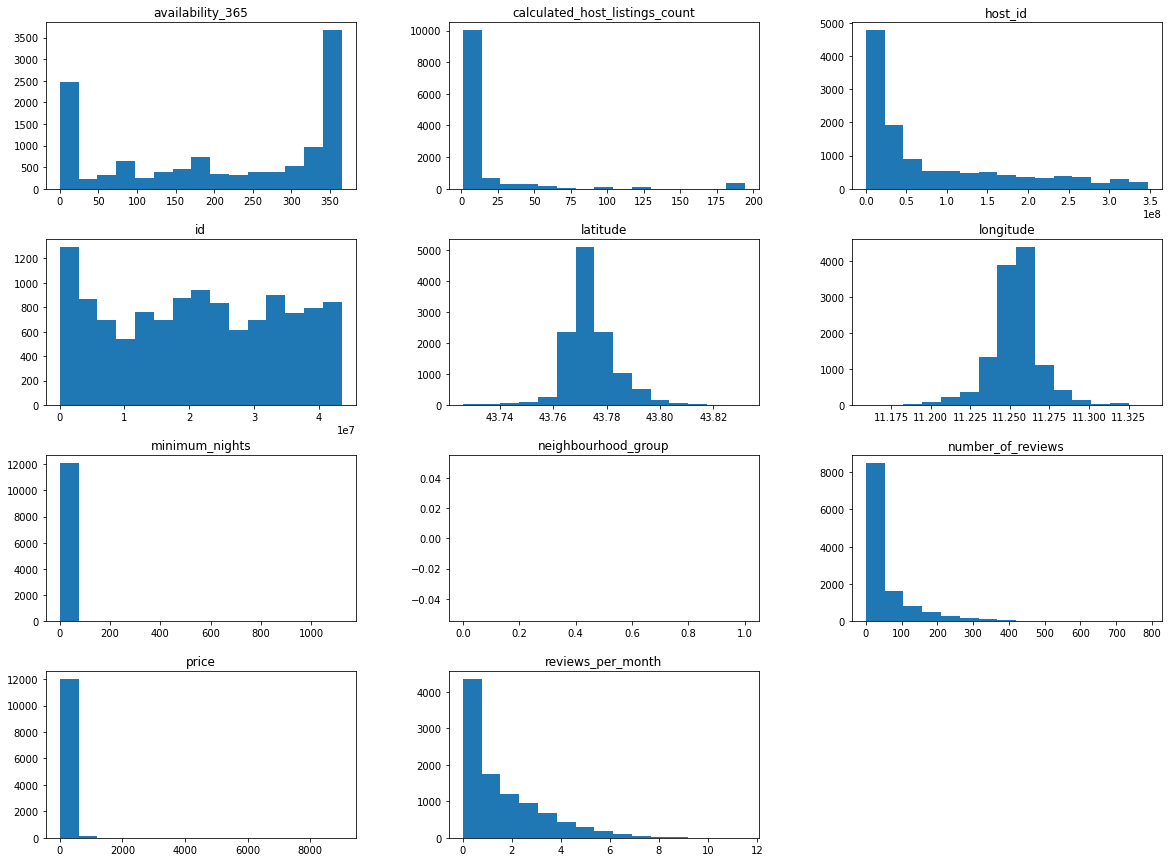

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15), grid=False);

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, se olharmos as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, é possível verificar indícios da presença de *outliers*.

Há valores completamente extremos, que distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots` para as variáveis.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,12124.000000,12124.00000,12124.000000,10056.00000,12124.000000,12124.000000
mean,111.068707,3.24934,52.404404,1.62177,14.541241,208.330831
std,190.331957,19.40518,81.382585,1.66396,36.080202,140.963742
min,0.000000,1.00000,0.000000,0.01000,1.000000,0.000000
25%,55.000000,1.00000,2.000000,0.31000,1.000000,74.000000
50%,80.000000,2.00000,17.000000,1.03000,3.000000,236.000000
75%,119.000000,3.00000,69.000000,2.47000,7.000000,352.000000
max,9000.000000,1120.00000,788.000000,11.50000,194.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses:

* A variável **price** possui 75% do valor menor ou igual a 119, porém seu valor máximo é 9000.
* A quantidade mínima de noites (**minimum_nights**) tem um valor máximo de 1120 noites, o que deturpa grosseiramente do restante dos valores, que são 75% de no mínimo 3 noites.

### Boxplot para minimum_nights

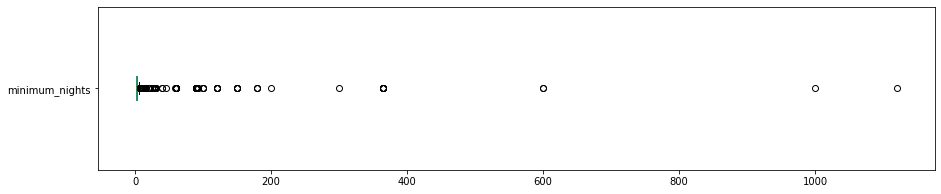

minimum_nights: >30
58 entradas
0.4784%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: >30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot para price

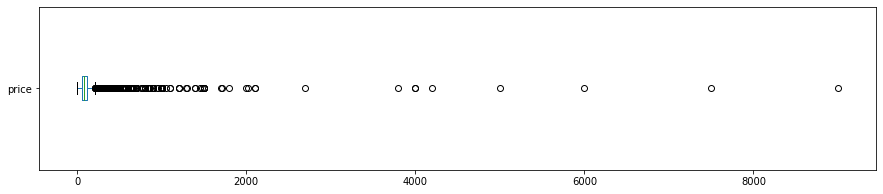

price: >600
132 entradas
1.0887%


In [ ]:
# 
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 600 euros para price
print("price: >600")
print("{} entradas".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0])*100))

### Histogramas sem *outliers*

Já que identificamos os *outliers* nas variáveis `minimum_nights` e `price`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

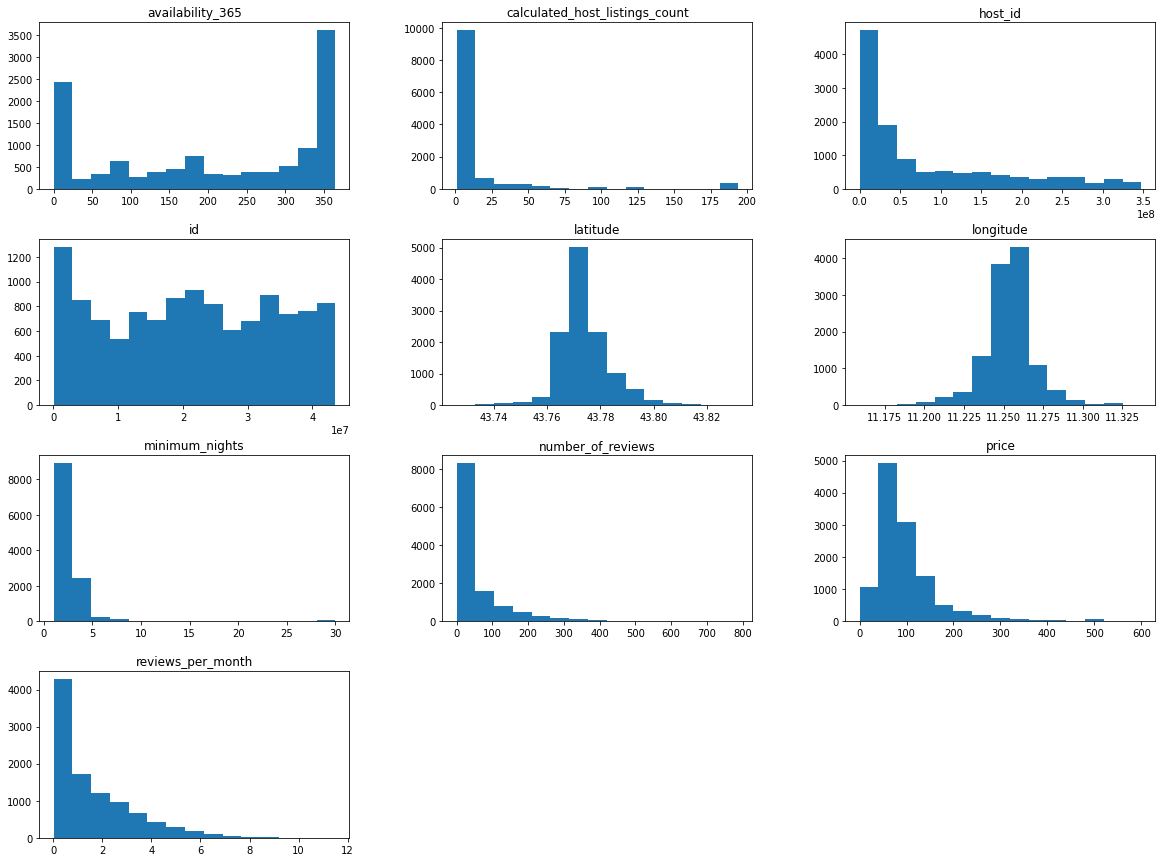

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,15), grid=False);

### **Q5. Qual a correlação existente entre as variáveis**

In [ ]:
# criar matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014689,-0.146439,-0.148208,0.122518,0.130492
minimum_nights,-0.014689,1.000000,-0.064409,-0.099579,0.011843,-0.006448
number_of_reviews,-0.146439,-0.064409,1.000000,0.798192,-0.113355,0.080386
reviews_per_month,-0.148208,-0.099579,0.798192,1.000000,-0.144706,0.050846
calculated_host_listings_count,0.122518,0.011843,-0.113355,-0.144706,1.000000,-0.052575
availability_365,0.130492,-0.006448,0.080386,0.050846,-0.052575,1.000000


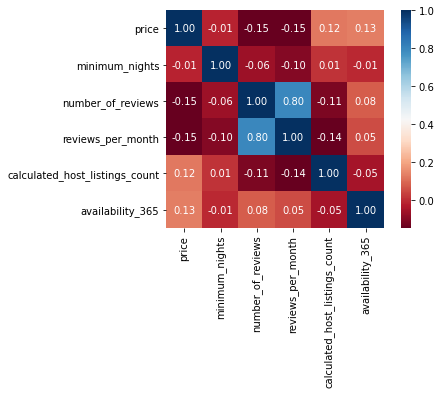

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Dentre as opções possíveis temos:

* *entire home/apt* - os hóspedes tem o lugar todo só para eles. 
* *private room* - os hóspedes têm seu próprio quarto privado para dormir. Outras áreas podem ser compartilhadas.
* *shared room* - os hóspedes dormem em um quarto ou em uma área comum, que pode ser compartilhada com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9147
Private room       2477
Hotel room          267
Shared room          44
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    76.640134
Private room       20.754085
Hotel room          2.237118
Shared room         0.368664
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Florença?**

Com o `groupby()` podemos varificar que é possível agrupar resultados de uma variável em função de outra. No caso, vamos comparar os **bairros** (neighbourhoods) a partir do **preço** de locação.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Centro Storico       106.583400
Gavinana Galluzzo     99.730435
Campo di Marte        74.693366
Isolotto Legnaia      69.722121
Rifredi               67.907351
Name: price, dtype: float64

*Obs:* No Airbnb só existe 5 bairros na cidade de Florença.

O Centro histórico, por ser o bairro mais movimentado e com os principais pontos turísticos, também é o mais caro para se hospedar.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada propriedade. Para isso, considera-se `x=longitude` e `y=latitude`.


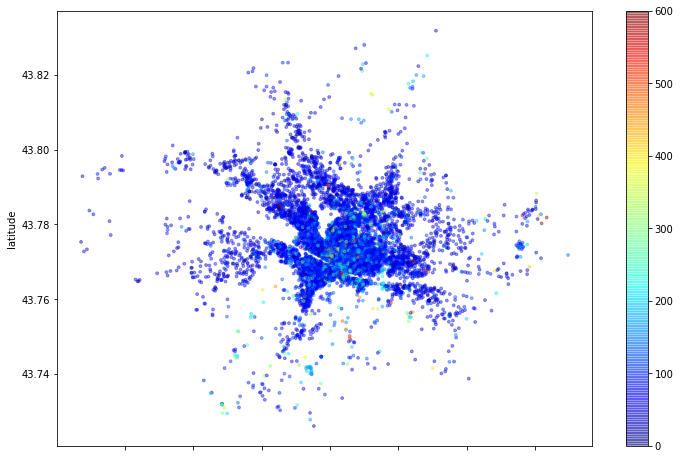

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

## Conclusões


Lembre-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis. Ver a lista detalhada: [listings.csv.gz](http://data.insideairbnb.com/italy/toscana/florence/2020-05-24/data/listings.csv.gz).

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém foi verificado e isolado os outliers existentes em algumas das variáveis, já que podem prejudicar a interpretação dos resultados. Isso foi caracterizado na etapa de distribuição das variáveis ao plotar um histograma.

Dentre as análises quantitativas verifiquei o tipo de imóvel mais alugado e a precificação média por bairro. Dados relevantes para turistas e investidores de imóveis.

Através das variáveis `latitude` e `longitude` gerei um *scatter plot* para mapear todas as propriedades disponíveis, sendo que a escala de cores, neste caso, está definida por preços. A geolocalização vai ser mais conveniente para quem tem alguma dúvida/necessidade e busca uma solução.